In [2]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Random Forests (Atsitiktiniai miskai)

#Parametrai 

# Medžių skaičius (n_estimators): Sprendimų medžių,
# kurie bus sukurti miške, skaičius.

# • Požymių skaičius (max_features): Požymių, į kuriuos
# reikia atsižvelgti ieškant geriausio suskirstymo,
# skaičius.

# • Maksimalus gylis (max_depth): Didžiausias kiekvieno
# medžio gylis.

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Importuojame RandomForestClassifier iš sklearn.ensemble
from sklearn.model_selection import train_test_split  # Importuojame train_test_split duomenų padalijimui
from sklearn.datasets import load_iris  # Importuojame load_iris duomenų rinkinį
from sklearn.metrics import accuracy_score  # Importuojame accuracy_score tikslumo įvertinimui

data = load_iris()  # Įkeliame Iris duomenų rinkinį
X, y = data.data, data.target  # Atskiriame požymius ir tikslines reikšmes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Padaliname duomenis į mokymo ir testavimo rinkinius (70% mokymo, 30% testavimo)

forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Inicializuojame RandomForest su 100 medžių
forest.fit(X_train, y_train)  # Apmokome modelį naudojant mokymo duomenis

y_pred = forest.predict(X_test)  # Prognozuojame testavimo rinkinio žymes

accuracy = accuracy_score(y_test, y_pred)  # Apskaičiuojame tikslumą
print(f'Tikslumas: {accuracy}')  # Atspausdiname tikslumo reikšmę


Tikslumas: 1.0


In [9]:
data.target_names   #pasiziurime ka ML spelioja (bando nustatyti kokiai rusiai augalas priklauso)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
# Accuraci parametru pavyzdziai 

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)
y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5
print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')


accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [17]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
np.random.uniform(0, .7, n_0).tolist() +
np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5
print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7111
Confusion matrix
[[ 364  136]
 [2753 6747]]
class 0 accuracy: 0.728
class 1 accuracy: 0.7102105263157895


model 1 AUC score: 0.5


RecursionError: maximum recursion depth exceeded

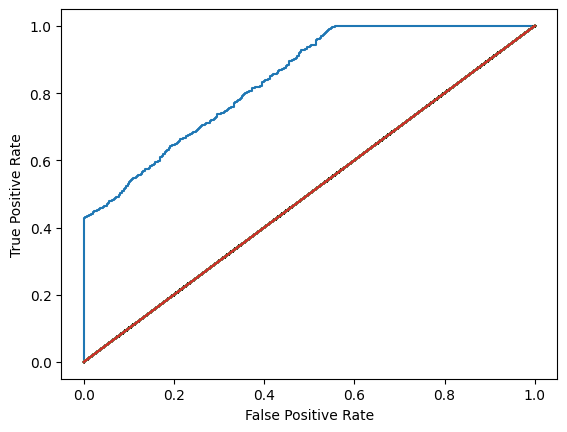

In [21]:
# Modelio tikslumo atvaizdavimas 
import matplotlib.pyplot as plt
def plot_roc_curve(true_y, y_prob): 
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

In [110]:
# Panaudodami mašininį mokymąsi (linearRegression, Logistic, DecisionTree ...) pateikite orų prognozę 24rioms valandoms į priekį. 
# Pritaikykite daugiau nei vieną ML algoritmą. Pateikite Modelių tikslumo įverčius. 
# Pateikite Modelio prognozę, LHMT tarnybos prognozę, o praėjus 24 valandoms - stebėjimų rezultatus, 
# pagal kuriuos apskaičiuosite modelių tikslumus.
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv(r'C:\Users\Pauliussl\Paskaita73\orai_savaite.csv')


data['laikas'] = pd.to_datetime(data['obs_time_utc']).dt.hour
data['obs_time_utc'] = pd.to_datetime(data['obs_time_utc'])
data['temp_pokytis'] = data['air_temperature'] - data['air_temperature'].shift(1)
data['wind_pokytis'] = data['wind_speed'] - data['wind_speed'].shift(1)

encoder = LabelEncoder()                                                            #Uzkoduojame oro salygas
data['condition_code_skaiciais'] = encoder.fit_transform(data['condition_code'])
data.drop(columns=['feels_like_temperature','wind_speed', 'wind_gust','wind_direction', 'wind_pokytis', 'condition_code'], inplace=True)                         #Lenteles sutvarkymas 

data = data.dropna()
data.head()




,obs_time_utc,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,precipitation,laikas,temp_pokytis,condition_code_skaiciais
1,2024-12-30 01:00:00,1.5,100.0,1018.6,100,0.0,1,-0.1,6
2,2024-12-30 02:00:00,1.6,100.0,1018.3,100,0.0,2,0.1,1
3,2024-12-30 03:00:00,1.6,100.0,1017.5,100,0.0,3,0.0,6
4,2024-12-30 04:00:00,1.8,100.0,1016.8,100,0.0,4,0.2,1
5,2024-12-30 05:00:00,2.4,100.0,1017.2,100,0.0,5,0.6,1


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear modelis (apmokome)

X = data.drop(columns=['obs_time_utc','air_temperature'])  # Sukuriame požymius (features)
y = data['temp_pokytis']  # Tikslinis kintamasis yra temperatūros pokytis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Padalijame duomenis į mokymo ir testavimo rinkinius

model = LinearRegression()  # Sukuriame tiesinės regresijos modelį
model.fit(X_train, y_train)  # Apmokome modelį

y_pred = model.predict(X_test)  # Prognozuojame testavimo rinkinio temperatūros pokyčius
print(y_pred)

# Prognoze ateinancioms valandoms 

spejimas = pd.DataFrame({
    'cloud_cover': [100], 
    'sea_level_pressure': [1015],
    'relative_hamidity': [100],
    'percipitation': [0],
    'laikas': [18],
    'condition_code_skaiciais': [0]
})

naujas_spejimas = model.predict(spejimas)
print(naujas_spejimas)




[-1.33539470e-15  2.00000000e-01 -1.00000000e-01 -2.00000000e-01
  2.00000000e-01  2.00000000e-01 -6.00000000e-01  2.00000000e-01
  6.00000000e-01 -2.00000000e-01 -1.00000000e-01 -1.00000000e-01
 -3.00000000e-01  7.00000000e-01 -1.00000000e-01  3.00000000e-01
 -2.00000000e-01  4.00000000e-01  3.00000000e-01  3.00000000e-01
 -2.00000000e-01 -5.00000000e-01  6.00000000e-01  1.00000000e-01
  2.00000000e-01  2.00000000e-01 -9.21142732e-16 -2.00000000e-01
  1.00000000e-01  1.00000000e-01  1.00000000e-01  7.00000000e-01
 -4.00000000e-01 -6.00000000e-01  3.00000000e-01  1.00000000e-01
  1.10000000e+00]


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- percipitation
- relative_hamidity
Feature names seen at fit time, yet now missing:
- precipitation
- relative_humidity
- temp_pokytis


In [ ]:
#Laikas, cloud cover, relative humidity, condition code, temp pokytis 
# Ciklas: speja, iraso spejima, permoko modeli

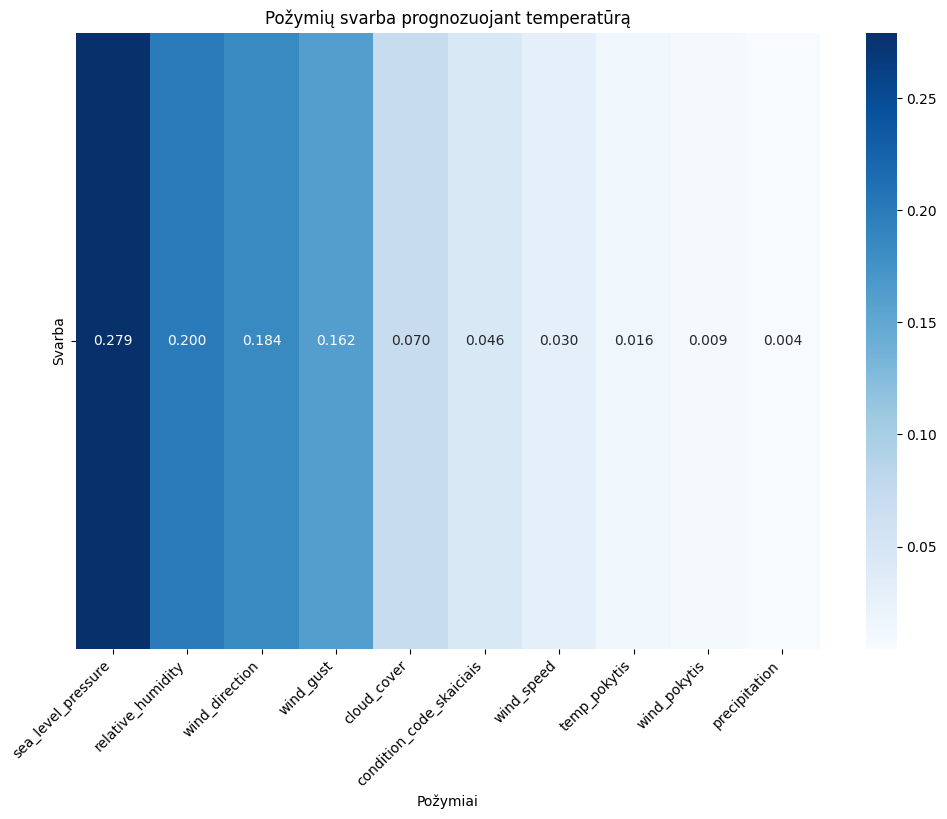

In [60]:
# Pozymiu svarba rezultatui 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Įkelkite duomenis
# data = pd.read_csv(r'C:\Users\Pauliussl\Paskaita73\orai_savaite.csv')

# Pasirinkite požymius ir tikslinį kintamąjį
X = data[['wind_speed', 'cloud_cover', 'relative_humidity', 'sea_level_pressure', 
          'wind_direction', 'precipitation',  'wind_gust', 'condition_code_skaiciais','temp_pokytis','wind_pokytis']]
y = data['air_temperature']

# Padalinkite duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apmokykite regresijos modelį (RandomForest)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Gaukite požymių svarbą
feature_importances = regressor.feature_importances_

# Sukurkite matricos duomenis (požymių įtakos koreliacija)
importance_matrix = pd.DataFrame({'Požymis': X.columns, 'Svarba': feature_importances})
importance_matrix.sort_values(by='Svarba', ascending=False, inplace=True)

# Vizualizuokite "confusion matrix" stiliaus grafiku
plt.figure(figsize=(12, 8))
sns.heatmap(importance_matrix[['Svarba']].T, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=importance_matrix['Požymis'], yticklabels=['Svarba'])
plt.title('Požymių svarba prognozuojant temperatūrą')
plt.xlabel('Požymiai')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sukuriame požymius (features) ir tikslinį kintamąjį (target)
X = data[['sea_level_pressure', 'relative_humidity', 'laikas', 'condition_code_skaiciais']]
y = data['temp_pokytis']  # Tikslinis kintamasis yra temperatūros pokytis

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir apmokome tiesinės regresijos modelį
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozuojame testavimo rinkinio temperatūros pokyčius
y_pred = model.predict(X_test)


